<a href="https://colab.research.google.com/github/nxxk23/AI-Engineer/blob/main/WORKSHOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AIEngineer/thai-inflaction-1M-45-years.csv')
data.head()

,year,balance (thb),inflaction (%)
0,1980,1000000.00,19.7
1,1981,803000.00,12.7
2,1982,701019.00,5.3
3,1983,663864.99,3.7
4,1984,639301.99,0.8


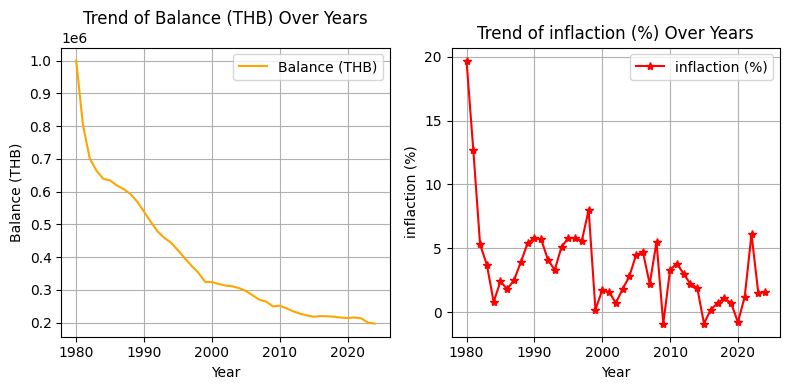

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Plot Balance (THB)
plt.subplot(1, 2, 1)
plt.plot(data['year'], data['balance (thb)'], color='orange', label='Balance (THB)')
plt.title('Trend of Balance (THB) Over Years')
plt.xlabel('Year')
plt.ylabel('Balance (THB)')
plt.grid(True)
plt.legend()

# Plot Inflaction (%)
plt.subplot(1, 2, 2)
plt.plot(data['year'], data['inflaction (%)'], marker='*', color='red', label='inflaction (%)')
plt.title('Trend of inflaction (%) Over Years')
plt.xlabel('Year')
plt.ylabel('inflaction (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
df = pd.DataFrame(data)

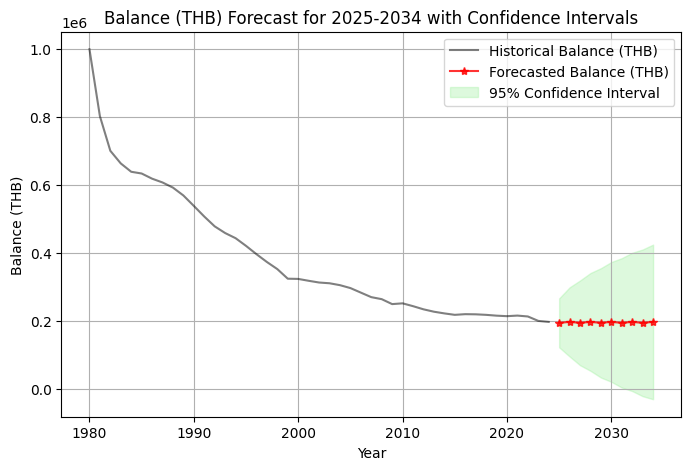

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model to the balance data
model = ARIMA(df['balance (thb)'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the balance for the next 10 years (2025-2034)
forecast_result = model_fit.get_forecast(steps=10)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Create future years for plotting (2025-2034)
future_years = list(range(2025, 2035))

# Plot the historical data and forecast with confidence intervals
plt.figure(figsize=(8, 5))

# Historical balance plot
plt.plot(df['year'], df['balance (thb)'], label='Historical Balance (THB)', color='black', alpha=0.5)

# Forecast balance plot
plt.plot(future_years, forecast, label='Forecasted Balance (THB)', marker='*', color='red', alpha=0.8)

# Plot confidence intervals
plt.fill_between(future_years, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.3, label='95% Confidence Interval')

# Add labels, title, and grid
plt.title('Balance (THB) Forecast for 2025-2034 with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Balance (THB)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


## **LSTM**
> ในช่วง 10 ปีต่อจากนี้ (2025 - 2035) มูลค่าของเงินก้อนนี้มันจะลดลงเหลือประมาณ :**`4,718.52 THB`**

In [35]:
df = pd.DataFrame(data)

In [36]:
!pip install keras

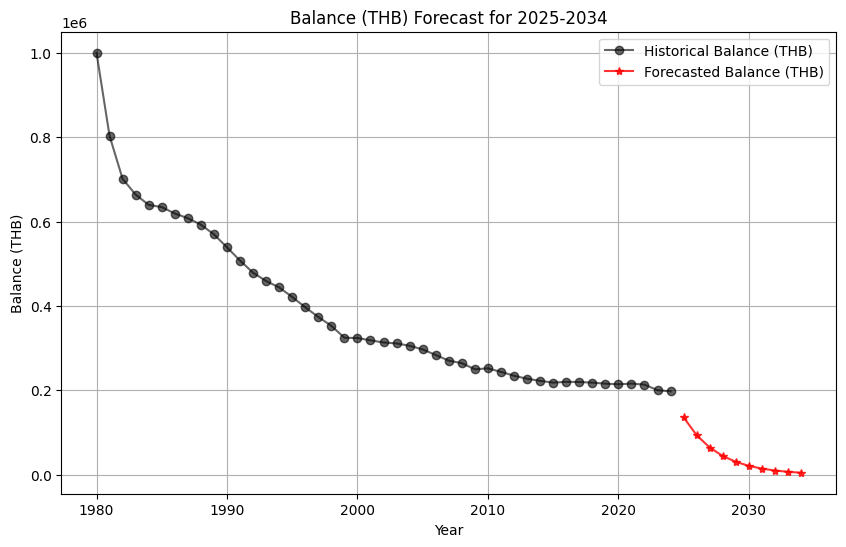

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Prepare data for LSTM
data = df['balance (thb)'].values.reshape(-1, 1)
n_steps = len(data)

# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mse')
model.fit(data, data, epochs=200, verbose=0)

# Forecast the next 10 years (2025-2034)
forecast = []
input_seq = data[-1].reshape((1, 1, 1))

for i in range(10):
    yhat = model.predict(input_seq, verbose=0)
    forecast.append(yhat[0, 0])
    input_seq = np.array(yhat).reshape((1, 1, 1))  # Use the prediction as the next input

# Visualize the results
plt.figure(figsize=(10, 6))

# Historical balance plot
plt.plot(df['year'], df['balance (thb)'], label='Historical Balance (THB)', marker='o', color='black', alpha=0.6)

# Forecast balance plot
plt.plot(future_years, forecast, label='Forecasted Balance (THB)', marker='*', color='red', alpha=0.8)

# Add labels, title, and grid
plt.title('Balance (THB) Forecast for 2025-2034')
plt.xlabel('Year')
plt.ylabel('Balance (THB)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [39]:
# Create a table of forecast values
future_years = list(range(2025, 2035))
forecast_table = pd.DataFrame({
    'Year': future_years,
    'Predicted Balance (THB)': forecast
})

# Print the forecast table
forecast_table

,Year,Predicted Balance (THB)
0,2025,135875.375000
1,2026,93533.648438
2,2027,64386.816406
3,2028,44322.964844
4,2029,30511.576172
5,2030,21004.208984
6,2031,14459.609375
7,2032,9954.492188
8,2033,6853.297852
9,2034,4718.524414


## **ARIMA**
> ในช่วง 10 ปีต่อจากนี้ (2025 - 2035) มูลค่าของเงินก้อนนี้มันจะลดลงเหลือประมาณ :**`19,7368 THB`**

In [23]:
# Create a table with predicted values and confidence intervals
forecast_table = pd.DataFrame({
    'Year': future_years,
    'Predicted Balance (THB)': forecast,
    'Lower Bound (95% CI)': conf_int.iloc[:, 0],
    'Upper Bound (95% CI)': conf_int.iloc[:, 1]
})

# Print the forecast table
forecast_table

,Year,Predicted Balance (THB),Lower Bound (95% CI),Upper Bound (95% CI)
45,2025,194619.984000,122579.442925,266660.525076
46,2026,197381.851304,95631.248030,299132.454578
47,2027,194623.478270,69951.944629,319295.011911
48,2028,197378.361456,53481.278509,341275.444402
49,2029,194626.963703,33704.177640,355549.749766
50,2030,197374.880432,21137.666309,373612.094555
51,2031,194630.440322,4237.964420,385022.916225
52,2032,197371.408211,-6129.797561,400872.613984
53,2033,194633.908150,-21242.090327,410509.906627
54,2034,197367.944771,-30153.319746,424889.209289
